In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/movie_review_wordcloud
!git clone https://github.com/piaochung/naver_movie_scrap.git

/content/drive/My Drive/movie_review_wordcloud
fatal: destination path 'naver_movie_scrap' already exists and is not an empty directory.


In [3]:
%cd naver_movie_scrap

/content/drive/My Drive/movie_review_wordcloud/naver_movie_scrap


In [4]:
from naver_movie import movie_scrap, review_scrap

In [5]:
!pip install konlpy wordcloud

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
from konlpy.tag import Hannanum
from wordcloud import WordCloud
from collections import Counter

In [7]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath)
fm._rebuild() 

In [8]:
movie_id = 132626
review_data = review_scrap.get_review_data(movie_id, start_page=1, end_page=10, spoiler='N')
movie_data = movie_scrap.get_movie_data(movie_id)

100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


In [9]:
review_data

[{'score': 10, 'text': '다시 봐도 재밌는 영화.미니언은 너무 귀엽고', 'user': '이도희(leed****)'},
 {'score': 5, 'text': '그냥 그럭저럭 함.  볼만했음', 'user': '조예준(yjbr****)'},
 {'score': 10, 'text': '진짜진짜 재미있는 영화 입니다 꼭 보세요', 'user': 'sk0(sk01****)'},
 {'score': 10, 'text': '진짜진짜 재미있는 영화 입니다 꼭 보세요', 'user': 'sk0(sk01****)'},
 {'score': 10,
  'text': '이 영화는 엄청나게 웃겼다. 그리고 미니언즈들 너무 귀여워',
  'user': '휘원솔인(a295****)'},
 {'score': 10, 'text': '존잼!!!!말이 필요없음!!!!', 'user': '러블리채(chae****)'},
 {'score': 10, 'text': '', 'user': '춘자(come****)'},
 {'score': 10, 'text': '재미있음 스토리 좋음 음악좋음', 'user': '김깨비(ccon****)'},
 {'score': 9,
  'text': '더이상 미니언즈에 의존하지 않아도 충분히 재밌을 수 있다는 것을 보여주다.',
  'user': 'cont****'},
 {'score': 10, 'text': '1편 2편보다 3편이 더 재밌음', 'user': '산나물(namu****)'},
 {'score': 5, 'text': '모르겠다. 왜 그랬을까,', 'user': 'Hami(gkag****)'},
 {'score': 6,
  'text': '슈퍼배드 시리즈 중에서 가장 재미없었음 너무 뻔하고 식상하며 진부했다',
  'user': '도르가(dani****)'},
 {'score': 10,
  'text': '네이쳐스웨이 자꾸 먹고 싶은 맛있는 비타 구미 비타민D3 1000IU 34,000원 스포츠 미니언즈 피규어가 랜덤으로 동봉되어 있습니다

In [10]:
import pandas as pd

df = pd.DataFrame(review_data)
df.drop_duplicates(['user'] ,keep='first', inplace=True)

In [11]:
user_id = [i+1 for i in range(len(df['user']))]
user = list(df['user'])

user_list = []

for pair in zip(user, user_id):
  user_list.append(pair)

dict_user_list = dict(user_list)

In [12]:
def anonymous_user_id(user):
  if dict_user_list[user]:
    return dict_user_list[user]

df['user'] = df['user'].apply(anonymous_user_id)

In [13]:
movie_data

{'genres': ['애니메이션', '코미디', '모험'],
 'story': '전 세계를 점령할 놈들이 온다!\n최고의 악당만을 보스로 섬기는 ‘미니언’\n가족을 위해 악당 은퇴를 선언한 ‘그루’\n그루의 배신에 실망한 미니언들은\n스스로 악당이 되기 위해 그루를 떠난다.\n한편, 같은 얼굴 다른 스펙의 쌍둥이 동생 ‘드루’의 등장으로 인해\n그루는 자신이 역사상 가장 위대한 악당 가문의 후예임을 알게 되고,\n거부할 수 없는 슈퍼배드의 운명을 따르게 되는데…\n돌아온 그루와 미니언들은\n다시 함께할 수 있을까?\n제작노트 보기',
 'title': '슈퍼배드 3'}

In [14]:
df

,score,text,user
0,10,다시 봐도 재밌는 영화.미니언은 너무 귀엽고,1
1,5,그냥 그럭저럭 함. 볼만했음,2
2,10,진짜진짜 재미있는 영화 입니다 꼭 보세요,3
4,10,이 영화는 엄청나게 웃겼다. 그리고 미니언즈들 너무 귀여워,4
5,10,존잼!!!!말이 필요없음!!!!,5
...,...,...,...
95,8,역쉬나 대단!!!! 기대를 저버리지 않아요,95
96,10,어른?아이 모두 재밌게 봤네요ㅎ,96
97,10,너무 재밋게 봤습니다 또 보고싶네요 굿입니다 ㅎㅎ,97
98,10,아이들이 너무 좋아해요~^^,98


In [15]:
extractor = Hannanum()

nouns = []
for text in df['text']:
  nouns.extend(extractor.nouns(text))
print(nouns)

['재밌', '영화', '미니언', '만', '진짜진짜', '영화', '보세요', '영화', '미니언즈들', '존잼', '말', '필요', '스토리', '음악좋음', '미니언즈', '의존', '재밌', '수', '것', '1편', '2편', '3편', '재밌음', '슈퍼배드', '시리즈', '중', '재미', '식상', '진부', '네이쳐스웨', '타', '구미', '비타민D3', '1000IU', '34,000원', '스포츠', '미니언즈', '피규어', '랜덤', '동봉', '기존', '슈퍼배드시리즈중', '재', '재미', '1.2', '볼만이라도했는데', '이영화', '다음날', '다봄', '별로혔음', '사촌나오는거빼', '웃긴요소', '실망', '그루동생', '진짜', '악당이', '것', '미니언즈', '재밌다', '캐릭터', '매력적', '재밌어요', '2번봤어욯ㅎㅎㅎ', '미니언즈', '재밌네', '이번편', '인상깊어요', '미니언즈', '스토리', '1.2편', '재미', '미니언즈', '비중', '너무작아짐', '3편', '그루편', '미니언즈', '물병(보온병)대박', '아이템', '릴', '앤', '스티치', '폰케이스만큼', '귀여움', '슈렉', '씨리즈', '이상', '대박난', '애니메이션', '씨리즈', '도라에몽', '상대', '될라', '귀여움', '차원', '외', '스핀오프', '재밌다', '일루미네이션', '디즈니', '미니언최고미니언최', '미니언', '봐도봐', '미니언즈들', '슈퍼배드', '자막판', '시리즈중', '주인', '삼만리', 'ㅋㅋ', '평론가', '느그들', '입맛', '감성', '평점내', '말', '소리하', '캐릭터들', '활용', '방법', '재밌', '아이들', '조아해요', '미니언', '귀여움', '실망', '미니언즈', '기야운것', '아재들', '겨냥해', '영화', 'ㅋㅋ', '슈퍼배드', '4', '좋겠다강력한', '악당', '등장하길', '미니언들이', '영원', '재미있는영

In [16]:
count = Counter(nouns)
words = dict(count.most_common())
print(words.keys())

dict_keys(['미니언즈', '영화', '미니언', '재미', '재밌', '슈퍼배드', '아이들', '악당', '아이', '것', '시리즈', '애니메이션', '그루', '스토리', '진짜', '재밌다', '귀여움', '4', '듯', '미니언즈들', '말', '필요', '수', '3편', '재밌음', '실망', '캐릭터', '매력적', '재밌네', '씨리즈', '시리즈중', 'ㅋㅋ', '먹여살리', '등장', 'ㅋ', '재밌게', '음악', '산만', '애', '이', 'ㅎㅎ', '기대', '최고', '어른', '만', '진짜진짜', '보세요', '존잼', '음악좋음', '의존', '1편', '2편', '중', '식상', '진부', '네이쳐스웨', '타', '구미', '비타민D3', '1000IU', '34,000원', '스포츠', '피규어', '랜덤', '동봉', '기존', '슈퍼배드시리즈중', '재', '1.2', '볼만이라도했는데', '이영화', '다음날', '다봄', '별로혔음', '사촌나오는거빼', '웃긴요소', '그루동생', '악당이', '재밌어요', '2번봤어욯ㅎㅎㅎ', '이번편', '인상깊어요', '1.2편', '비중', '너무작아짐', '그루편', '물병(보온병)대박', '아이템', '릴', '앤', '스티치', '폰케이스만큼', '슈렉', '이상', '대박난', '도라에몽', '상대', '될라', '차원', '외', '스핀오프', '일루미네이션', '디즈니', '미니언최고미니언최', '봐도봐', '자막판', '주인', '삼만리', '평론가', '느그들', '입맛', '감성', '평점내', '소리하', '캐릭터들', '활용', '방법', '조아해요', '기야운것', '아재들', '겨냥해', '좋겠다강력한', '등장하길', '미니언들이', '영원', '재미있는영화라고생각합니', '착쁜', '강약조절', '부분', '쌍둥이', '억지', '지루', '맛', 'ㅎㅎㅎ', '귀여웠어요~^---^초1아', '네살', '무린가보아요', '잘본영화'

In [17]:
stop_words = ['영화', '감독', '배우', 'ㅋㅋ', 'ㅎㅎ', 'ㅠㅠ', '근데', '진짜']

for word in list(words.keys()):
  if len(word) == 1:
    del words[word]
    continue
  if words[word] == 1:
    del words[word]

for word in stop_words:
  if word in words.keys():
    del words[word]

In [18]:
%cd /content/drive/My Drive/movie_review_wordcloud/output

/content/drive/My Drive/movie_review_wordcloud/output


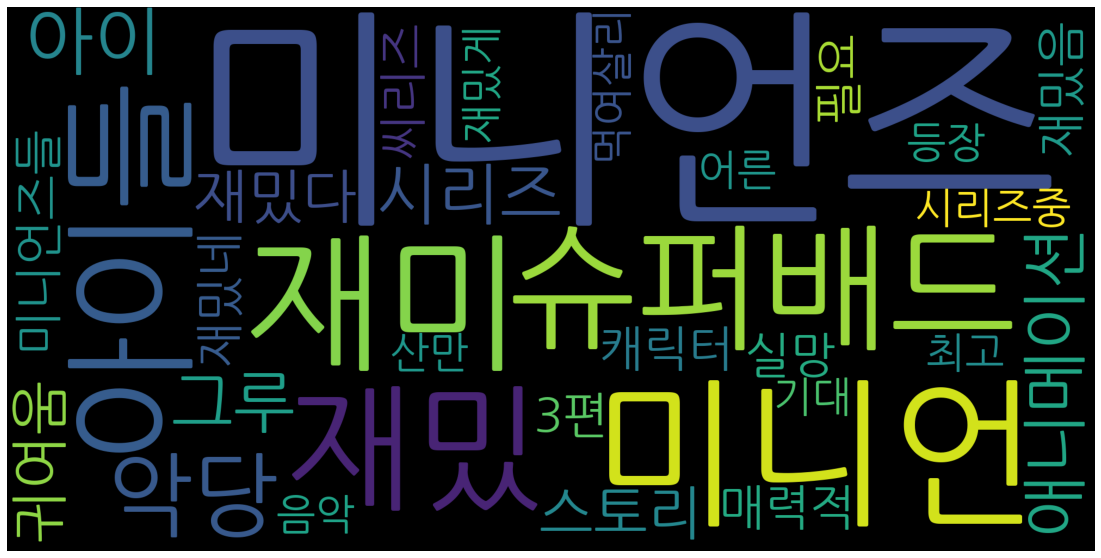

In [19]:
wordcloud = WordCloud(
    font_path = fontpath,
    width=2000,
    height=1000
).generate_from_frequencies(words)

file_name = './{}.png'.format(movie_data['title'])

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.savefig(file_name, dpi=300)
plt.axis('off')
plt.show()